# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = '../data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 boxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [39]:
#1
"""
Your code here
"""
cut_rule = [-np.inf,0,2,5,np.inf]
# （...] ; 左邊不包含, 實際等同 大於下界、上界以下(含)
# 即 -1~0不包含-1, 0~2不包含0, 2~5不包含2, 5~99不包含5
app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=False, labels=['0','1-2','3-5','>5'])
# include_lowest 是否包含下界
app_train['CNT_CHILDREN_GROUP'].value_counts()

0      215371
1-2     87868
3-5      4230
>5         42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [74]:
#2-1
grp = "CNT_CHILDREN_GROUP"

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
# 參考ch10， GroupBy機制

grouped_df.mean()

CNT_CHILDREN_GROUP
0      166288.713566
1-2    174725.712648
3-5    173626.303191
>5     147910.714286
Name: AMT_INCOME_TOTAL, dtype: float64

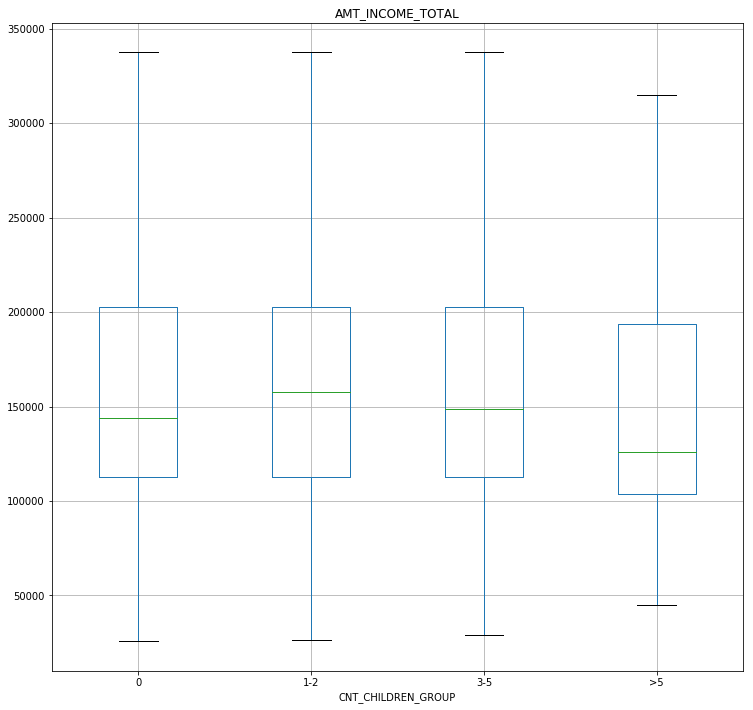

In [75]:
#2-2
"""
Your code here
"""
plt_column = 'AMT_INCOME_TOTAL'
# 讀取的column
plt_by = 'CNT_CHILDREN_GROUP'
# 同group by

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))

plt.suptitle('')
plt.show()

In [76]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x:  (x- np.mean(x)) / np.std(x))
# grouped_df 的 type 為 pandas.core.groupby.generic.SeriesGroupBy

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.345857
1,270000.0,0.990556
2,67500.0,-0.943540
3,135000.0,-0.298841
4,121500.0,-0.427781


In [78]:

app_train.groupby('AMT_INCOME_TOTAL').head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN_GROUP,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.345857
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.990556
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.943540
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.298841
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.427781
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0,-0.642680
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0.0,0.0,0.0,1.0,1.0,2.0,1-2,-0.009056
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.850154
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,-0.513741
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.298841
